### Импорт библиотек:
#### В этой части кода импортируются необходимые библиотеки, такие как numpy, scipy, matplotlib.pyplot и sklearn.covariance.EllipticEnvelope. Они используются для работы с данными, статистикой, визуализации и обнаружения аномалий.

In [ ]:
# Импорт необходимых библиотек
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

In [2]:
# Для отображения графиков в Jupyter Notebook
%matplotlib inline
# Установка размера графиков
plt.rcParams["figure.figsize"] = (8,6)

### Определение параметров генерации данных:
#### Здесь задаются параметры для генерации данных, такие как количество измерений (num_dimensions), количество образцов (num_samples) и коэффициент аномалий (outlier_ratio).

In [3]:
# Определение параметров для генерации данных
num_dimensions = 2
num_samples = 1000
outlier_ratio = 0.01
num_inliers = int(num_samples * (1-outlier_ratio))
num_outliers = num_samples - num_inliers

### Генерация данных:
#### Данный блок кода создает двумерные данные. Сначала генерируются "внутренние" (inliers) данные с помощью нормального распределения, а затем добавляются "выбросы" (outliers) из случайного равномерного распределения.

In [4]:
# Генерация нормально распределенных "внутренних" данных (inliers)
x = np.random.randn(num_inliers, num_dimensions)

# Добавление "выбросов" (outliers) из случайного равномерного распределения
x_rand = np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))
x = np.r_[x, x_rand]

# Создание меток, 1 для "внутренних" данных и -1 для "выбросов"
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

### Визуализация данных:
#### После генерации данных происходит их визуализация с помощью библиотеки matplotlib. "Внутренние" данные отображаются зелеными точками ('go'), а "выбросы" - черными точками ('ko').

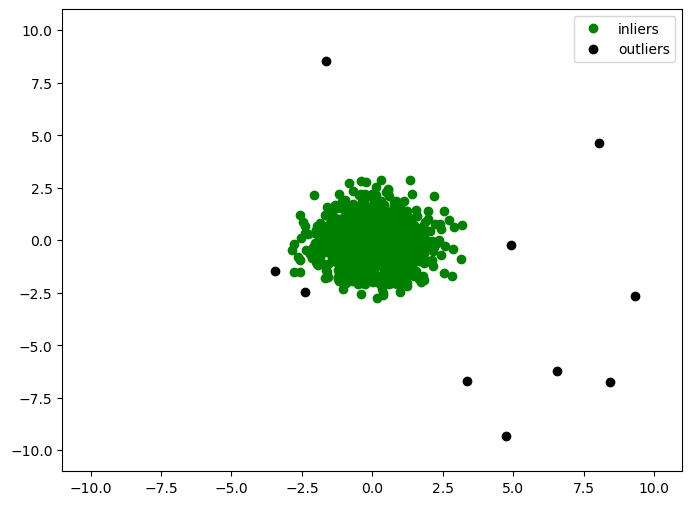

In [5]:
# Визуализация данных
inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

##  Применение sklearn.covariance.EllipticEnvelope

### Обнаружение выбросов с помощью Elliptic Envelope:
#### В этой части кода применяется алгоритм обнаружения выбросов с использованием EllipticEnvelope из библиотеки sklearn. Модель обучается на сгенерированных данных, а затем применяется для предсказания аномальных точек.

In [6]:
# Применение EllipticEnvelope из библиотеки sklearn для обнаружения выбросов
classifier = EllipticEnvelope(contamination=outlier_ratio)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

Number of errors: 0


### Оценка результатов и визуализация:
#### Для оценки результатов используется функция decision_function, которая вычисляет оценочную функцию для каждой точки. Затем строится контурное представление аномалий и "пороговое" значение для определения аномалий.

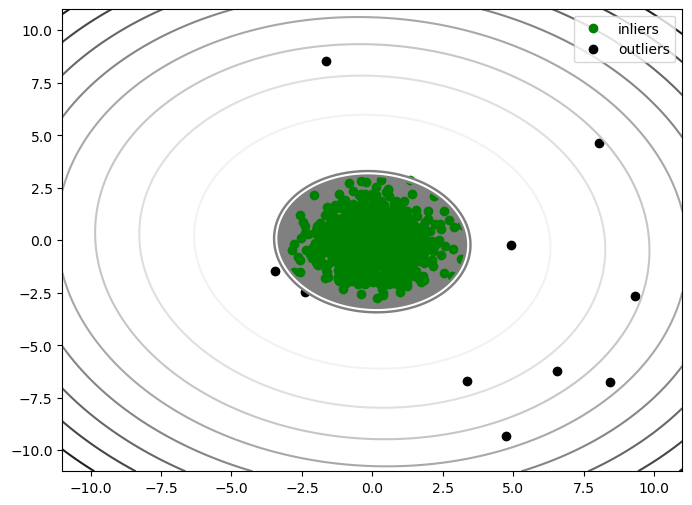

In [7]:
# Оценка и визуализация результатов
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold], linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')
plt.xlim(-11,11)
plt.ylim(-11,11)

plt.legend(numpoints=1)
plt.show()

### Пример применения на не гауссовом распределении:
#### В этой части кода создаются данные, не соответствующие нормальному распределению, и производится аналогичный процесс обнаружения аномалий.

In [8]:
# Пример применения на не гауссовом распределении
x_0 = np.random.randn(num_inliers//3, num_dimensions) - 3
x_1 = np.random.randn(num_inliers//3, num_dimensions)
x_2 = np.random.randn(num_inliers//3, num_dimensions) + 4

# Добавление "выбросов" из случайного равномерного распределения
x = np.r_[x_0, x_1, x_2, np.random.uniform(low=-10, high=10, size=(num_outliers, num_dimensions))]

# Создание меток, 1 для "внутренних" данных и -1 для "выбросов"
labels = np.ones(num_samples, dtype=int)
labels[-num_outliers:] = -1

### Оценка результатов и визуализация для не гауссового распределения:
#### Здесь повторяется процесс обнаружения аномалий для данных, которые не подчиняются нормальному распределению, с последующей оценкой результатов и визуализацией.

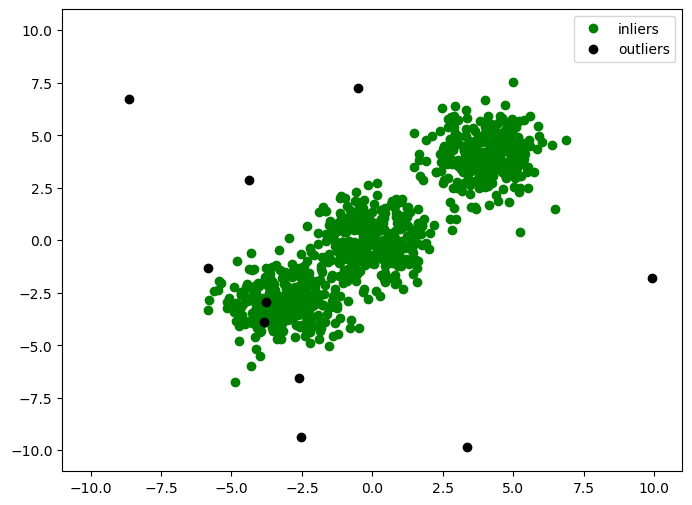

In [9]:
# Визуализация данных
inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

In [10]:
# Применение EllipticEnvelope из библиотеки sklearn для обнаружения выбросов на не гауссовом распределении
classifier = EllipticEnvelope(contamination=outlier_ratio)
classifier.fit(x)
y_pred = classifier.predict(x)
num_errors = sum(y_pred != labels)
print('Number of errors: {}'.format(num_errors))

Number of errors: 4


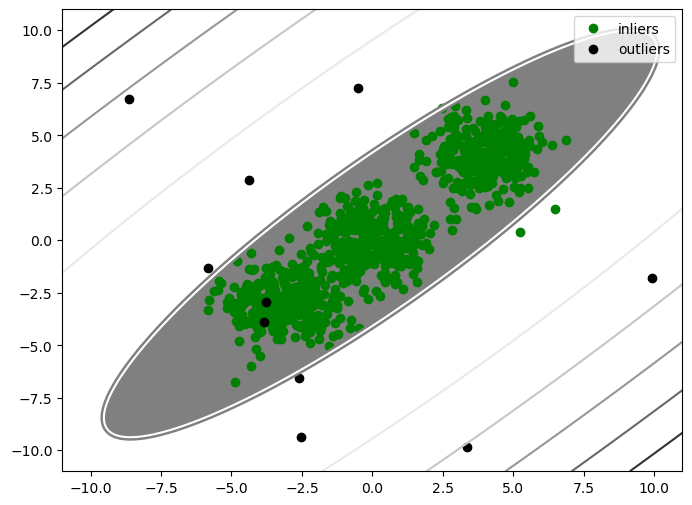

In [11]:
# Оценка и визуализация результатов
scores_pred = classifier.decision_function(x)
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_ratio)
xx, yy = np.meshgrid(np.linspace(-11,11,1000), np.linspace(-11,11,1000))
Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

inlier_plot = plt.plot(x[:num_inliers,0], x[:num_inliers,1], 'go', label='inliers')
outlier_plot = plt.plot(x[-num_outliers:,0], x[-num_outliers:,1], 'ko', label='outliers')

plt.contour(xx, yy, Z, levels=[threshold], linewidths=5, colors='gray')
plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Greys_r)
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='gray')

plt.xlim(-11,11)
plt.ylim(-11,11)
plt.legend(numpoints=1)
plt.show()

## Этот код демонстрирует использование метода обнаружения выбросов с помощью Elliptic Envelope на данных, как соответствующих нормальному распределению, так и не соответствующих ему. В результате можно видеть, как модель справляется с обнаружением аномалий в обоих случаях.